In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#!pip install plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.1/15.6 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.1/15.6 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.1/15.6 MB 425.1 kB/s eta 0:00:37
    --------------------------------------- 0.2/15.6 MB 655.1 kB/s eta 0:00:24
    --------------------------------------- 0.2/15.6 MB 655.1 kB/s eta 0:00:24
    --------------------------------------- 0.2/15.6 MB 655.1 kB/s eta 0:00:24
    --------------------------------------- 0.2/15.6 MB 655.1 kB/s eta 0:00:24
    --------------------------------------- 0.4/15.6 MB 757.8 kB/s eta 0:00:21
    --------------------------------------- 0.4/15.6 MB 757.8 kB/s eta 0:00:21
   - -

In [51]:
df = pd.read_csv('../data/cleaned_data_v7.csv')
df

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,1.0,1.0,Amtala,0.191,2,0,0
1,Residential Apartment,Kolkata South,3.0,10500,0,5,1115.5,natural quest,1.0,1.0,EM Bypass,1.175,6,0,0
2,Residential Apartment,Kolkata South,3.0,8900,0,5,1446.0,ganguly 4sight eminence,1.0,1.0,Garia,1.285,5,0,0
3,Residential Apartment,Kolkata South,3.0,5215,0,5,1295.0,dtc sojon,1.0,1.0,Joka,0.675,10,0,0
4,Residential Apartment,Kolkata South,2.0,5108,0,5,920.0,dtc sojon,1.0,1.0,Joka,0.470,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,Residential Apartment,Kolkata South,4.0,15022,4,1,3528.0,urbana,1.0,10.0,EM Bypass,5.300,11,15,55
5666,Residential Apartment,Kolkata South,3.0,9000,4,3,2000.0,privet,1.0,2.0,New Alipore,1.800,7,15,41
5667,Residential Apartment,Kolkata South,3.0,8410,4,2,1843.0,ambuja upohar the condoville,2.0,14.0,Chak Garia,1.550,8,15,55
5668,Residential Apartment,Kolkata South,3.0,8417,4,2,2079.0,ambuja upohar the condoville,2.0,10.0,Chak Garia,1.750,8,15,55


In [60]:
latlong = pd.read_csv('LATLONG.csv')

In [61]:
latlong.shape

(472, 3)

In [62]:
new_df = df.merge(latlong, on='Location')

In [63]:
new_df.columns

Index(['PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'AGE', 'AREA', 'SOCIETY_NAME', 'BALCONY_NUM', 'FLOOR_NUM',
       'Location', 'price', 'no_of_landmarks', 'FEATURES_SCORE',
       'AMENITIES_SCORE', 'Latitude', 'Longitude'],
      dtype='object')

In [64]:
new_df

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE,Latitude,Longitude
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,1.0,1.0,Amtala,0.1910,2,0,0,22.364447,88.274642
1,Residential Apartment,Kolkata South,3.0,3616,0,5,943.0,srijan star swapno puron,1.0,1.0,Amtala,0.3410,2,0,0,22.364447,88.274642
2,Residential Apartment,Kolkata South,1.0,3651,0,5,422.5,srijan star swapno puron,1.0,1.0,Amtala,0.1475,2,0,0,22.364447,88.274642
3,Independent House/Villa,Kolkata South,3.0,2500,2,5,1800.0,on request,3.0,2.0,Amtala,0.4500,4,12,44,22.364447,88.274642
4,Independent House/Villa,Kolkata South,4.0,2546,2,5,2160.0,on request,3.0,2.0,Amtala,0.5500,4,35,61,22.364447,88.274642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,Residential Apartment,Kolkata North,3.0,8175,1,6,1529.0,elita garden vista,1.0,16.0,Biman Nagar,1.2500,5,52,99,22.631295,88.436160
5666,Residential Apartment,Kolkata South,5.0,30769,2,5,6500.0,the ramdulari,3.0,5.0,Ballygunge Park,20.0000,5,15,37,22.532614,88.368853
5667,Residential Apartment,Kolkata Central,4.0,23255,2,2,4300.0,ps astoria,2.0,5.0,Rowdon Street,10.0000,5,48,68,22.544408,88.358333
5668,Residential Apartment,Kolkata South,2.0,3481,2,5,768.0,sundaram apartment,1.0,1.0,Rabindra Nagar,0.2674,2,13,29,22.532537,88.257759


In [65]:
grp_df = new_df.groupby('Location')[['price','PRICE_PER_UNIT_AREA','AREA','Latitude','Longitude']].mean()

In [66]:
grp_df

,price,PRICE_PER_UNIT_AREA,AREA,Latitude,Longitude
Location,,,,,
5/1B MM Feeder Road.Kolkata-700057,0.380000,4400.000000,862.000000,22.665262,88.371312
AA 1D NEWTOWN,0.650000,5900.000000,1100.000000,22.632687,88.450763
AJC Bose Road,3.850000,19250.000000,2000.000000,22.559080,88.366280
Action Area 1,0.936713,6197.828947,1456.736842,22.581047,88.462231
Action Area 2,0.938157,6889.525424,1342.144068,22.601340,88.471506
...,...,...,...,...,...
on embypass,0.857600,8000.000000,1072.000000,22.499014,88.399040
purbachal,0.602500,5762.750000,1045.500000,22.506744,88.393845
rajathat chowmatha,0.240000,3060.000000,784.000000,22.628334,88.483600


In [67]:
fig = px.scatter_mapbox(grp_df, lat="Latitude", lon="Longitude", color="PRICE_PER_UNIT_AREA", size='AREA',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=grp_df.index)
fig.show()

In [69]:
new_df.to_csv('data_viz1.csv',index=False)

-------------------------------------

In [71]:
df1 = pd.read_csv('../data/cleaned_data_v8_1.csv')

In [80]:
fig = px.scatter(df1, x="AREA", y="price", color="BEDROOM_NUM", title="Area Vs Price")

# Show the plot
fig.show()

C:\Users\rouna\AppData\Local\Temp\ipykernel_21756\2837659644.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\rouna\anaconda3\envs\my_deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rouna\AppData\Local\Temp\ipykernel_21756\2837659644.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

<Axes: xlabel='price', ylabel='Density'>

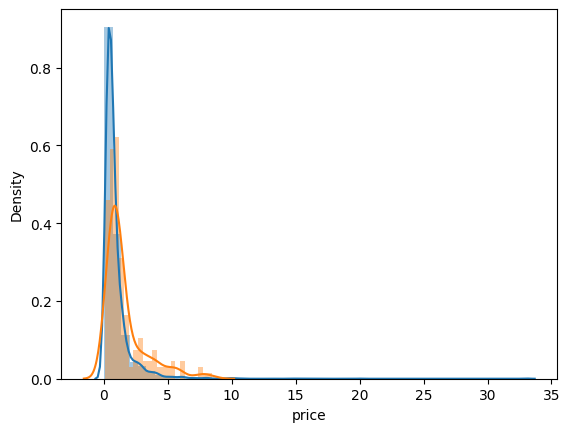

In [81]:
sns.distplot(df[df['PROPERTY_TYPE'] == 'Residential Apartment']['price'])
sns.distplot(df[df['PROPERTY_TYPE'] == 'Independent House/Villa']['price'])

In [88]:
import plotly.figure_factory as ff
# group_labels = ['distplot']
# fig = ff.create_distplot([df[df['PROPERTY_TYPE'] == 'Residential Apartment']['price']], group_labels)
# fig.show()
# fig = ff.create_distplot([df[df['PROPERTY_TYPE'] == 'Residential Apartment']['price']], group_labels)
# fig.show()

hist_data = [df[df['PROPERTY_TYPE'] == 'Residential Apartment']['price'], df[df['PROPERTY_TYPE'] == 'Independent House/Villa']['price']]

group_labels = ['Residential Apartment', 'Independent House/Villa']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()